In [ ]:
# 3

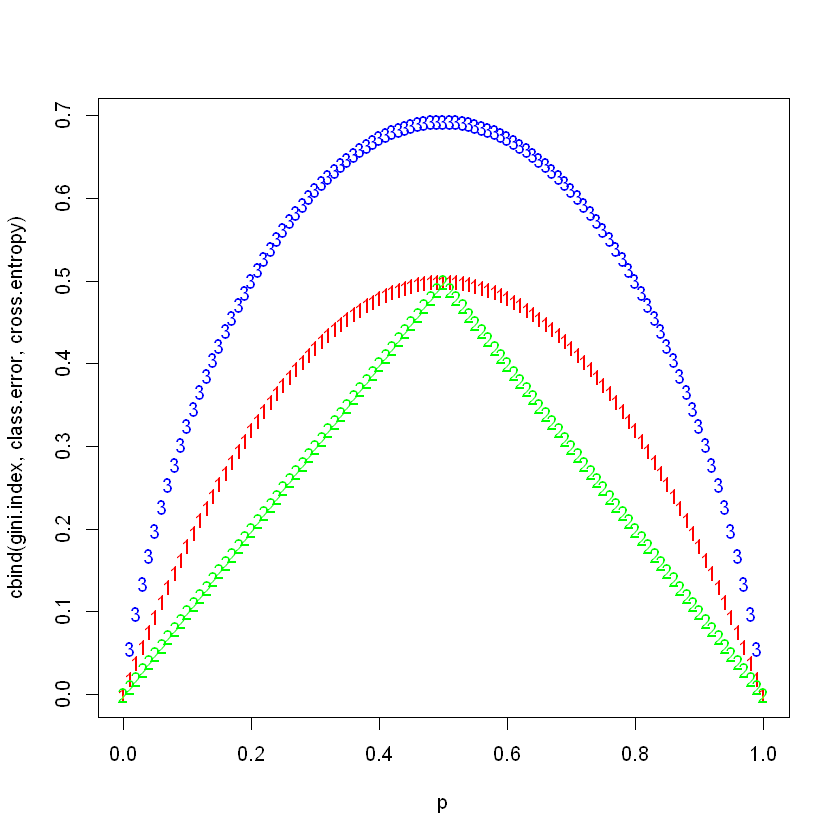

In [1]:
p <- seq(0, 1, 0.01)
gini.index <- 2 * p * (1 - p)
class.error <- 1 - pmax(p, 1 - p)
cross.entropy <- - (p * log(p) + (1 - p) * log(1 - p))
matplot(p, cbind(gini.index, class.error, cross.entropy), col = c("red", "green", "blue"))


In [2]:
# 5

In [3]:
# Majority vote approach: classify X as Red as it is the most commonly occurring class among the 10 predictions 
# 6 for Red vs 4 for Green.
# Average probability approach, classify X as Green as the average of the 10 probabilities is 0.45

In [4]:
# 8

In [5]:
# a

In [6]:
library(ISLR)
set.seed(1)
train <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
Carseats.train <- Carseats[train, ]
Carseats.test <- Carseats[-train, ]

In [7]:
# b

In [8]:
library(tree)
tree.carseats <- tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)

Warning message:
"package 'tree' was built under R version 3.6.3"


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

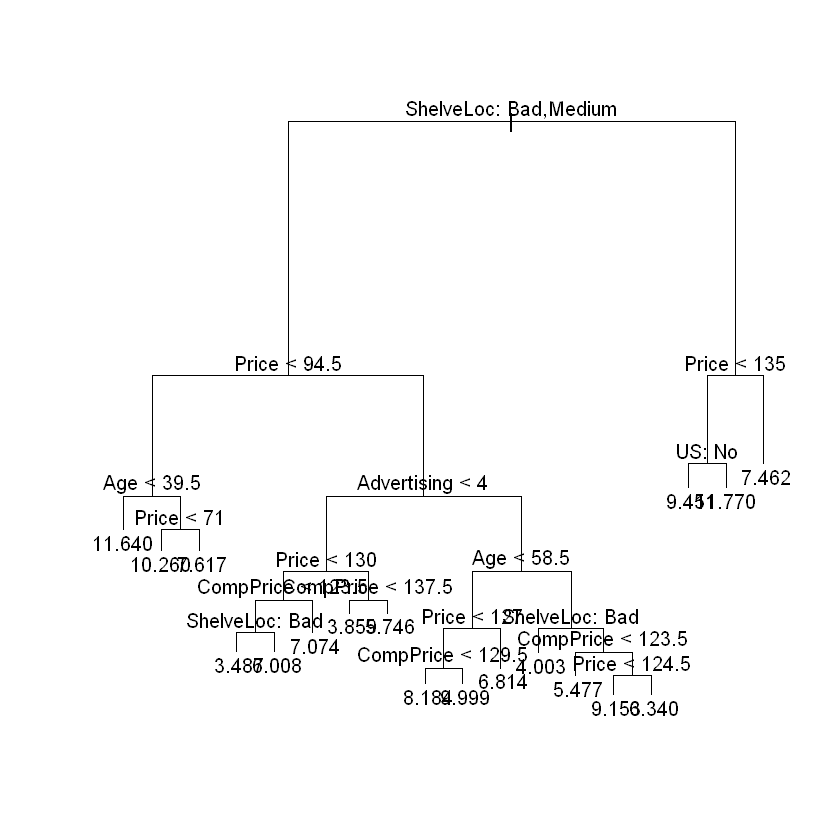

In [9]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [10]:
yhat <- predict(tree.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 4.922039

In [11]:
# c

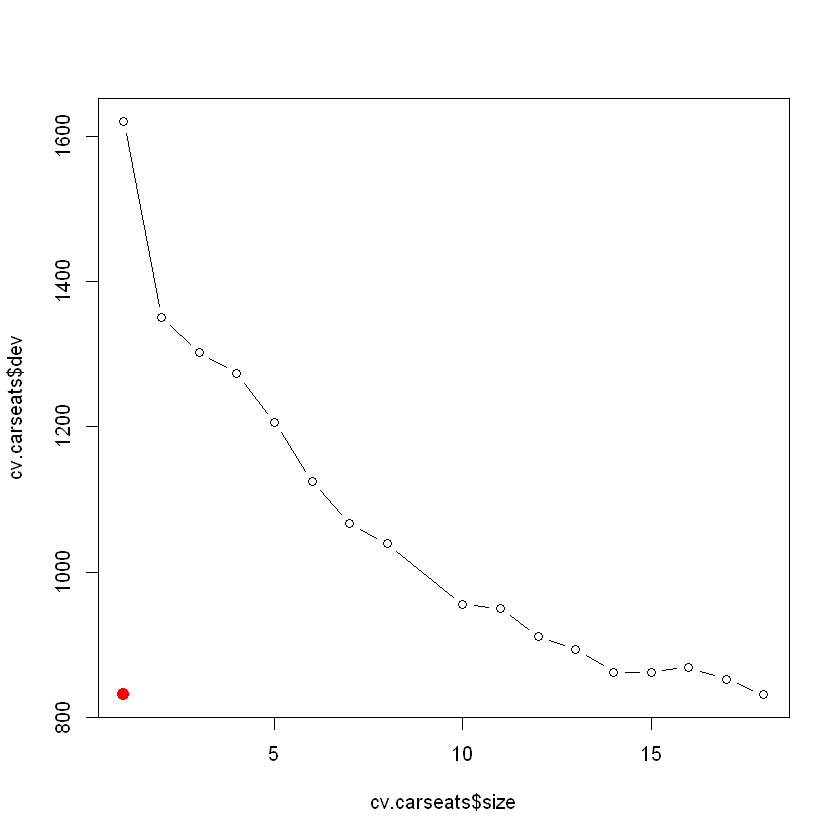

In [12]:
cv.carseats <- cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = "b")
tree.min <- which.min(cv.carseats$dev)
points(tree.min, cv.carseats$dev[tree.min], col = "red", cex = 2, pch = 20)

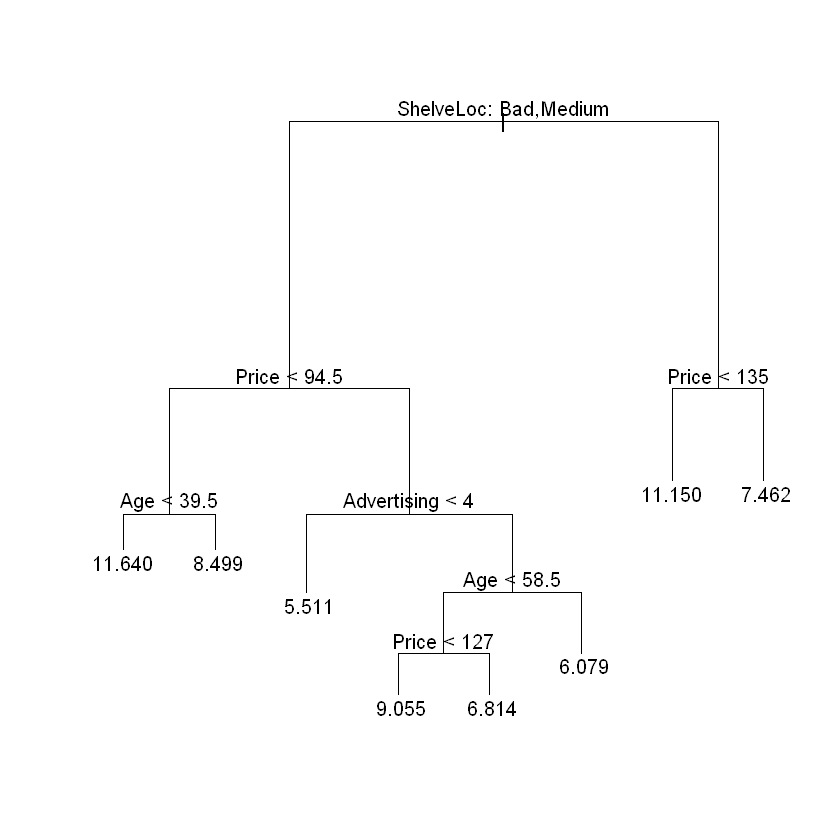

In [13]:
prune.carseats <- prune.tree(tree.carseats, best = 8)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [14]:
yhat <- predict(prune.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 5.113254

In [17]:
# d

In [18]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [19]:
bag.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, importance = TRUE)
yhat.bag <- predict(bag.carseats, newdata = Carseats.test)
mean((yhat.bag - Carseats.test$Sales)^2)

[1] 2.657296

In [20]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


In [21]:
# e

In [22]:
rf.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 3, ntree = 500, importance = TRUE)
yhat.rf <- predict(rf.carseats, newdata = Carseats.test)
mean((yhat.rf - Carseats.test$Sales)^2)

[1] 3.049406

In [23]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,12.9489323,158.48521
Income,2.2754686,129.59400
Advertising,8.9977589,111.94374
Population,-2.2513981,102.84599
Price,33.4226950,391.60804
ShelveLoc,34.0233545,290.56502
Age,12.2185108,171.83302
Education,0.2592124,71.65413
Urban,1.1382113,14.76798
US,4.1925335,33.75554


In [24]:
# 9

In [25]:
# a

In [27]:
set.seed(123)
train <- sample(1:nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [28]:
# b

In [29]:
tree.oj <- tree(Purchase ~ ., data = OJ.train)
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [30]:
# c

In [31]:
tree.oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1071.00 CH ( 0.60875 0.39125 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.0356415 56   10.03 MM ( 0.01786 0.98214 ) *
       9) LoyalCH > 0.0356415 114  108.90 MM ( 0.18421 0.81579 ) *
     5) LoyalCH > 0.276142 180  245.20 MM ( 0.42222 0.57778 )  
      10) PriceDiff < 0.05 74   74.61 MM ( 0.20270 0.79730 ) *
      11) PriceDiff > 0.05 106  144.50 CH ( 0.57547 0.42453 ) *
   3) LoyalCH > 0.5036 450  357.10 CH ( 0.86444 0.13556 )  
     6) PriceDiff < -0.39 27   32.82 MM ( 0.29630 0.70370 ) *
     7) PriceDiff > -0.39 423  273.70 CH ( 0.90071 0.09929 )  
      14) LoyalCH < 0.705326 130  135.50 CH ( 0.78462 0.21538 )  
        28) PriceDiff < 0.145 43   58.47 CH ( 0.58140 0.41860 ) *
        29) PriceDiff > 0.145 87   62.07 CH ( 0.88506 0.11494 ) *
      15) LoyalCH > 0.705326 293  112.50 CH ( 0.952

In [32]:
# d

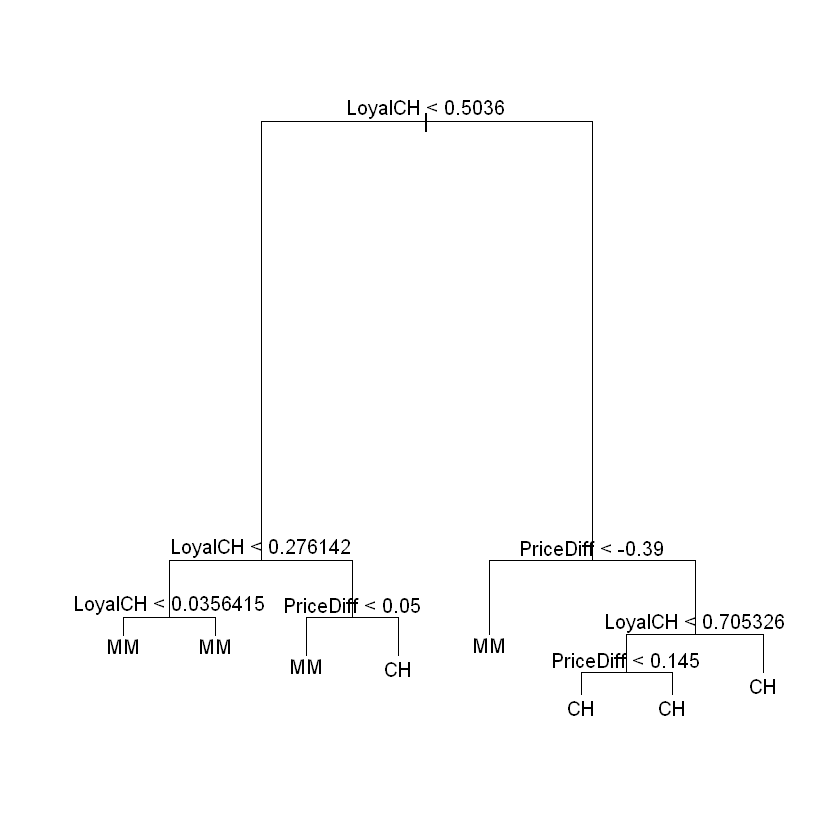

In [33]:
plot(tree.oj)
text(tree.oj, pretty = 0)

In [34]:
# e

In [35]:
tree.pred <- predict(tree.oj, OJ.test, type = "class")
table(tree.pred, OJ.test$Purchase)

         
tree.pred  CH  MM
       CH 150  34
       MM  16  70

In [36]:
1 - (147 + 62) / 270

[1] 0.2259259

In [37]:
# f

In [38]:
cv.oj <- cv.tree(tree.oj, FUN = prune.misclass)
cv.oj

$size
[1] 8 5 3 2 1

$dev
[1] 141 138 161 165 313

$k
[1] -Inf    0    8   11  154

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [39]:
# g

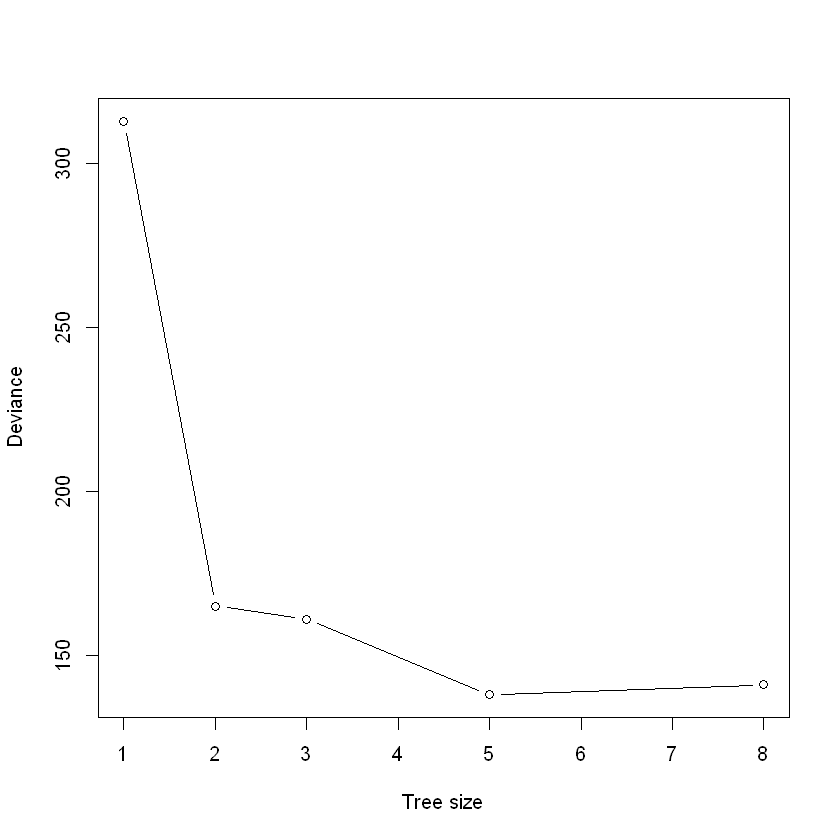

In [40]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree size", ylab = "Deviance")

In [41]:
# h

In [43]:
# The 2-node tree is the smallest tree with the lowest classification error rate.

In [44]:
# i

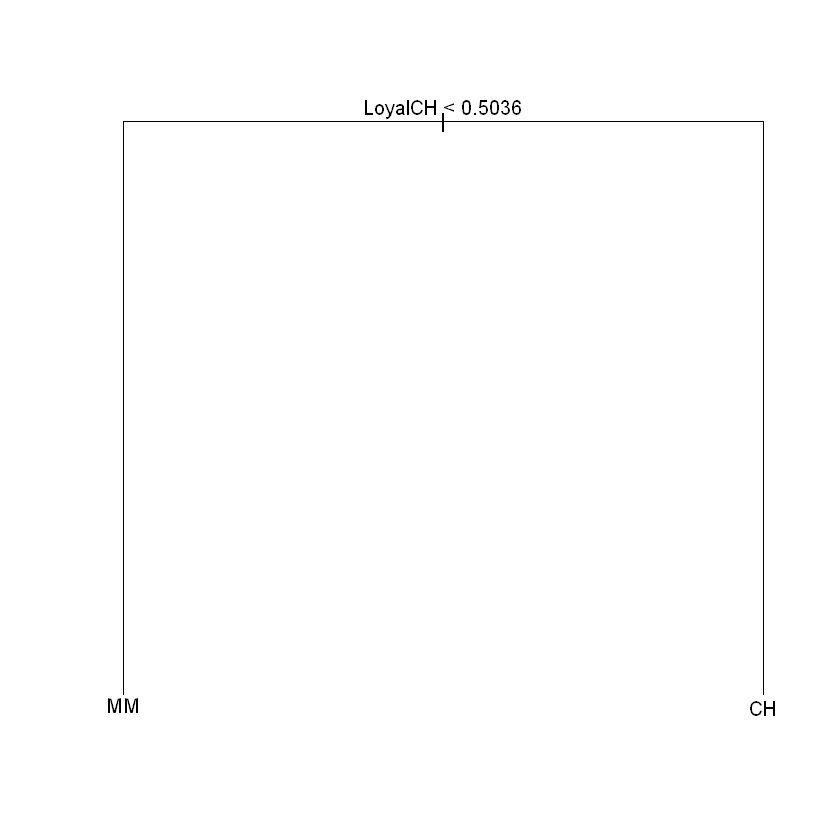

In [45]:
prune.oj <- prune.misclass(tree.oj, best = 2)
plot(prune.oj)
text(prune.oj, pretty = 0)

In [46]:
# j

In [47]:
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7625 = 603.9 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [48]:
summary(prune.oj)


Classification tree:
snip.tree(tree = tree.oj, nodes = 2:3)
Variables actually used in tree construction:
[1] "LoyalCH"
Number of terminal nodes:  2 
Residual mean deviance:  0.9677 = 772.2 / 798 
Misclassification error rate: 0.1988 = 159 / 800 

In [50]:
# k

In [51]:
prune.pred <- predict(prune.oj, OJ.test, type = "class")
table(prune.pred, OJ.test$Purchase)

          
prune.pred  CH  MM
        CH 131  20
        MM  35  84

In [52]:
1 - (119 + 81) / 270

[1] 0.2592593

In [54]:
# 10

In [55]:
# a

In [56]:
Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

In [57]:
# b

In [58]:
train <- 1:200
Hitters.train <- Hitters[train, ]
Hitters.test <- Hitters[-train, ]

In [59]:
# c

In [61]:
install.packages("gbm")

package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ffan1\AppData\Local\Temp\RtmpkjInCE\downloaded_packages


Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


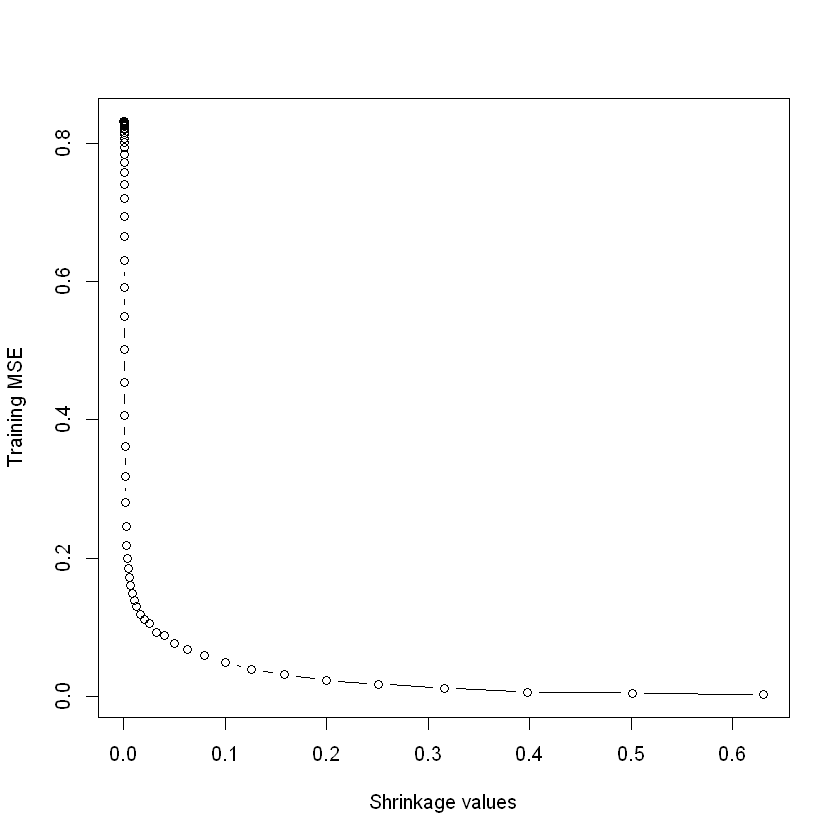

In [62]:
library(gbm)
set.seed(1)
pows <- seq(-10, -0.2, by = 0.1)
lambdas <- 10^pows
train.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    pred.train <- predict(boost.hitters, Hitters.train, n.trees = 1000)
    train.err[i] <- mean((pred.train - Hitters.train$Salary)^2)
}
plot(lambdas, train.err, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")

In [63]:
# d

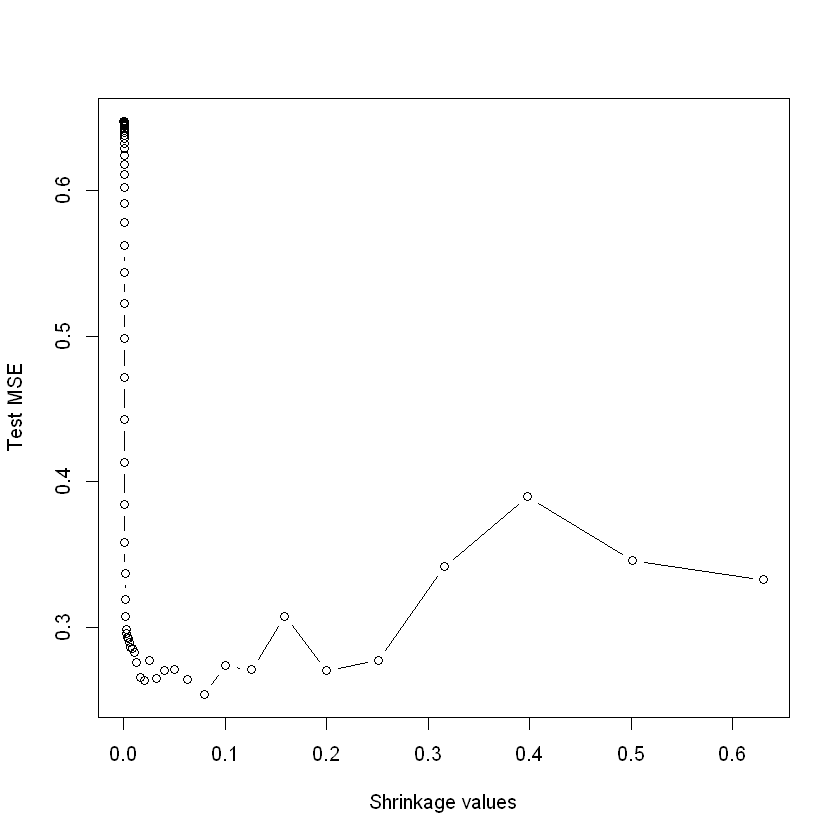

In [64]:
set.seed(1)
test.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    yhat <- predict(boost.hitters, Hitters.test, n.trees = 1000)
    test.err[i] <- mean((yhat - Hitters.test$Salary)^2)
}
plot(lambdas, test.err, type = "b", xlab = "Shrinkage values", ylab = "Test MSE")

In [65]:
min(test.err)

[1] 0.2540265

In [66]:
lambdas[which.min(test.err)]

[1] 0.07943282

In [67]:
# e

In [68]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [69]:
fit1 <- lm(Salary ~ ., data = Hitters.train)
pred1 <- predict(fit1, Hitters.test)
mean((pred1 - Hitters.test$Salary)^2)

[1] 0.4917959

In [70]:
x <- model.matrix(Salary ~ ., data = Hitters.train)
x.test <- model.matrix(Salary ~ ., data = Hitters.test)
y <- Hitters.train$Salary
fit2 <- glmnet(x, y, alpha = 0)
pred2 <- predict(fit2, s = 0.01, newx = x.test)
mean((pred2 - Hitters.test$Salary)^2)

[1] 0.4570283

In [71]:
# f

,var,rel.inf
CAtBat,CAtBat,20.8404970
CRBI,CRBI,12.3158959
Walks,Walks,7.4186037
PutOuts,PutOuts,7.1958539
Years,Years,6.3104535
CWalks,CWalks,6.0221656
CHmRun,CHmRun,5.7759763
CHits,CHits,4.8914360
AtBat,AtBat,4.2187460
RBI,RBI,4.0812410


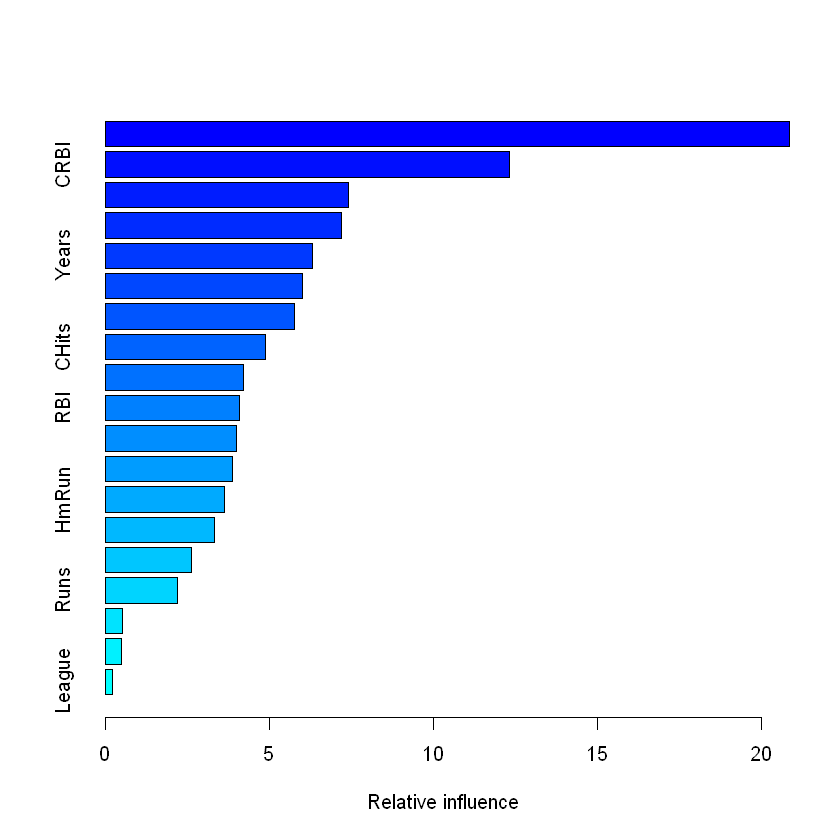

In [72]:
boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.err)])
summary(boost.hitters)

In [73]:
# g

In [74]:
set.seed(123)
bag.hitters <- randomForest(Salary ~ ., data = Hitters.train, mtry = 19, ntree = 500)
yhat.bag <- predict(bag.hitters, newdata = Hitters.test)
mean((yhat.bag - Hitters.test$Salary)^2)

[1] 0.23044